In [70]:
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
fp=r"C:\Users\ACER\Downloads\books.csv"
x=pd.read_csv(fp)

In [72]:
wot=x['original_title'].isna().sum()
print(wot)

36


In [73]:
fp1=r"C:\Users\ACER\Downloads\book_tags.csv"
y=pd.read_csv(fp1)

In [74]:
fp2=r"C:\Users\ACER\Downloads\ratings.csv"
z=pd.read_csv(fp2)

In [75]:
x= x.dropna(subset=['original_title'])
y = y[y['goodreads_book_id'].isin(x['goodreads_book_id'])]
z = z[z['book_id'].isin(x['book_id'])]
unique_books_count = x['book_id'].nunique()
print(unique_books_count)

363


In [76]:
unique_users_count = z['user_id'].nunique()
print(unique_users_count)

40573


In [77]:
unique_tags_count = y['tag_id'].nunique()
print(unique_tags_count)

3438


In [78]:
most_frequent_tag_id = y['tag_id'].value_counts().idxmax()
print(most_frequent_tag_id)


4600


In [79]:
most_tagged_book_id = y['count'].idxmax()
most_tagged_book_title = x.loc[x['goodreads_book_id'] ==  y.loc[most_tagged_book_id, 'goodreads_book_id'], 'title'].values[0]
print(most_tagged_book_title)


Bossypants


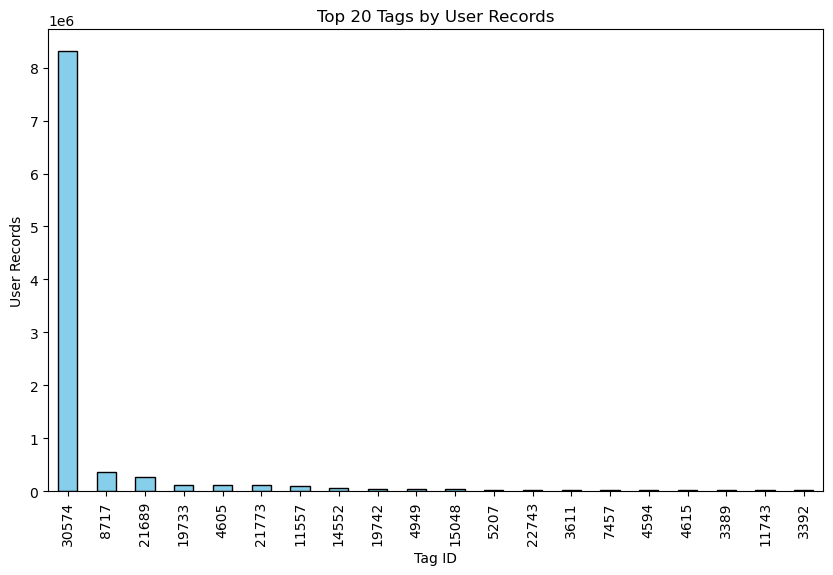

In [80]:
top_tags = y.groupby('tag_id')['count'].sum().sort_values(ascending=False).head(20)
top_tags.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Top 20 Tags by User Records')
plt.xlabel('Tag ID')
plt.ylabel('User Records')
plt.show()